In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load the Excel File
file_path = "E-Grocery Experience Survey_ India.xlsx"
df = pd.read_excel(file_path, sheet_name="Formatted")

In [3]:
# Preview the data
print("Data Loaded:", df.shape)
df.head()

Data Loaded: (129, 78)


,Age,Gender,City_Tier,Household_Type,Occupation,Monthly_Income,Online_Shopping_Frequency,Frequently_Bought_Products_Online,Category_Groceries,Category_Medicines,...,Category_customer service.1,Category_returns.1,Amazon_Fresh_Challenges_Dissatisfaction,Category_delivery delays,Category_product quality issues,Category_pricing,Category_limited slots,Category_customer support,Category_app issues,Repeat_Purchase_Reason_Amazon_Fresh
0,35-44,Male,Tier-1 (Metropolitan cites),Family with young children,Salaried Professional,"₹50,001-₹75,000",Multiple times a week,"Groceries, Medicines, Electronics, Home Decor",1,1,...,0,0,Limited slots,0,0,0,1,0,0,NaN
1,18-24,Female,Tier-3 (Towns),Family with teens,Student,"Above ₹1,00,000",2-3 times a month,"Fashion, Electronics, Home Decor",0,0,...,0,0,NaN,0,0,0,0,0,0,NaN
2,18-24,Male,Tier-3 (Towns),Family with teens,Student,"Below ₹25,000",Less than once a month,"Fashion, Electronics",0,0,...,0,0,NaN,0,0,0,0,0,0,NaN
3,18-24,Male,Tier-3 (Towns),Family with teens,Student,"Below ₹25,000",Less than once a month,Electronics,0,0,...,0,0,NaN,0,0,0,0,0,0,NaN
4,18-24,Male,Tier-1 (Metropolitan cites),Single,Student,"Below ₹25,000",Less than once a month,"Fashion, Electronics",0,0,...,0,0,NaN,0,0,0,0,0,0,NaN


In [4]:
# Step 3: Clean Key Columns for Analysis
df['Used_Amazon_Fresh'] = df['Used_Amazon_Fresh'].astype(str).str.strip().str.lower()
df['Gender'] = df['Gender  '].astype(str).str.strip()
df['City_Tier'] = df['City_Tier'].astype(str).str.strip()

In [5]:
# Rename a few important columns for easier access
df.rename(columns={
    'Online_Grocery_Platforms_Used': 'Used_Platforms',
    'Attitude_Towards_New_Online_Services': 'Willingness',
}, inplace=True)

In [6]:
# Step 4: Overall Usage Metrics
af_yes = df[df['Used_Amazon_Fresh'] == 'yes'].shape[0]
af_no = df[df['Used_Amazon_Fresh'] == 'no'].shape[0]
print(f"\n Amazon Fresh Users: {af_yes} ({round(af_yes / len(df) * 100, 2)}%)")
print(f" Non Amazon Fresh Users: {af_no} ({round(af_no / len(df) * 100, 2)}%)")


 Amazon Fresh Users: 34 (26.36%)
 Non Amazon Fresh Users: 95 (73.64%)


In [7]:
# Increase plot size
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style("whitegrid")

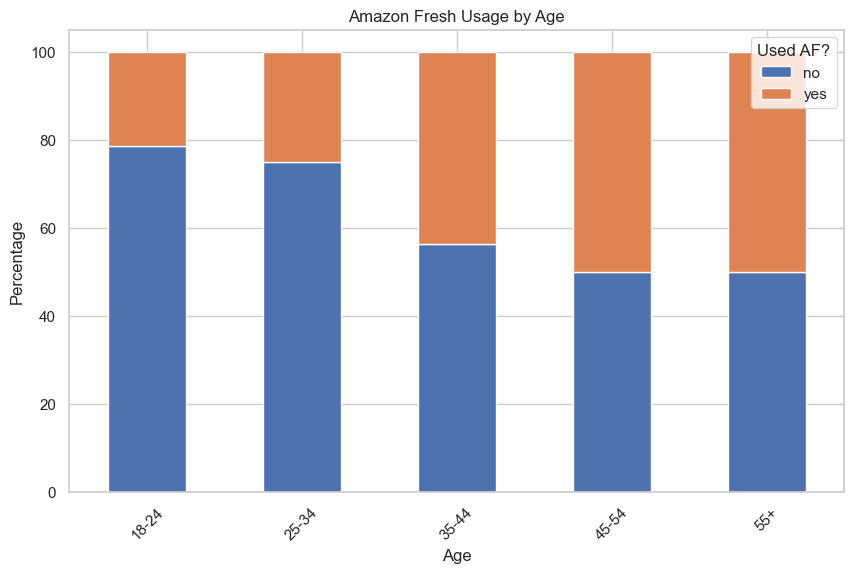

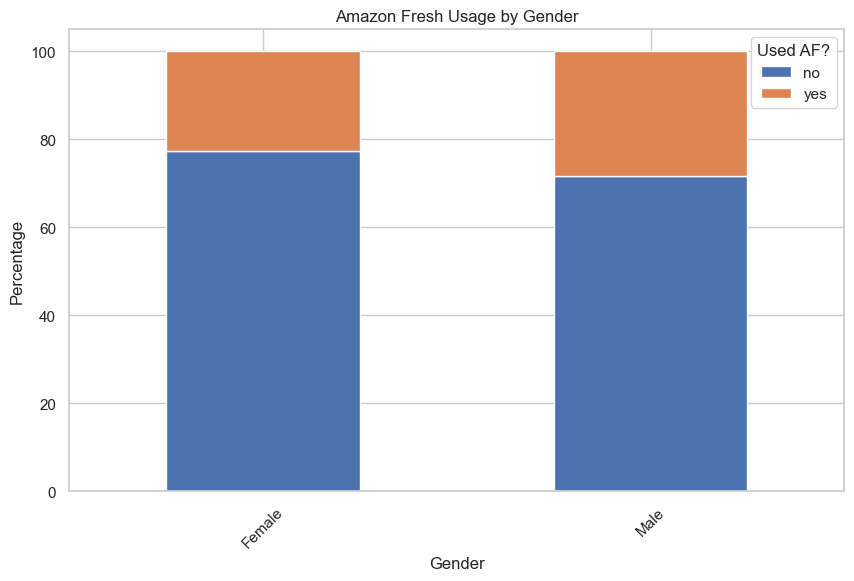

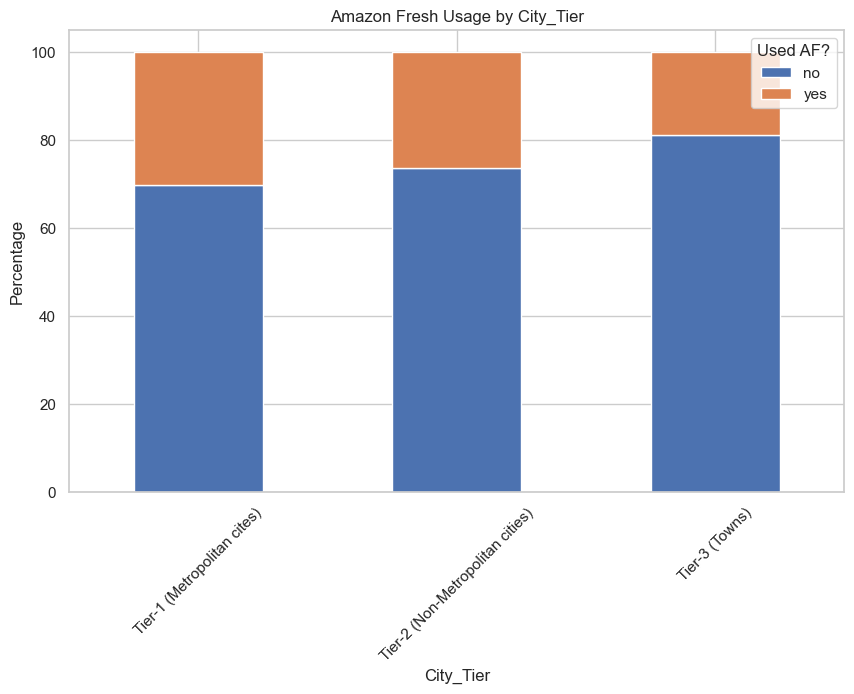

In [8]:
# Step 5: Amazon Fresh Usage by Demographics
def plot_af_usage_by(column):
    group = df.groupby([column, 'Used_Amazon_Fresh']).size().unstack().fillna(0)
    group_percent = group.div(group.sum(axis=1), axis=0) * 100
    group_percent.plot(kind='bar', stacked=True)
    plt.title(f"Amazon Fresh Usage by {column}")
    plt.ylabel("Percentage")
    plt.legend(title='Used AF?')
    plt.xticks(rotation=45)
    plt.show()

plot_af_usage_by("Age")
plot_af_usage_by("Gender")
plot_af_usage_by("City_Tier")

<Figure size 1200x600 with 0 Axes>

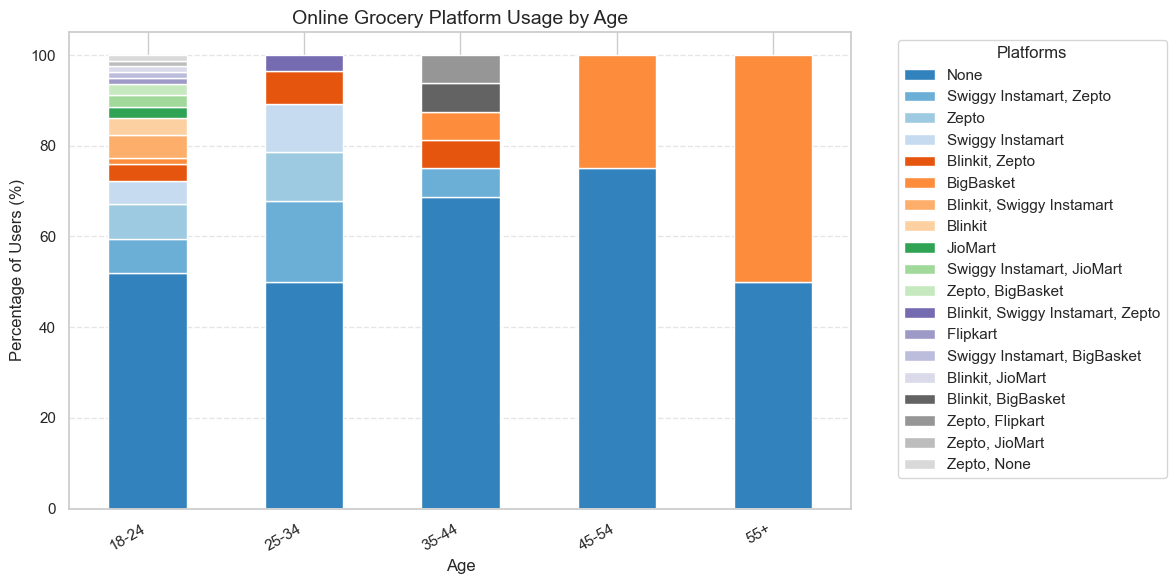

<Figure size 1200x600 with 0 Axes>

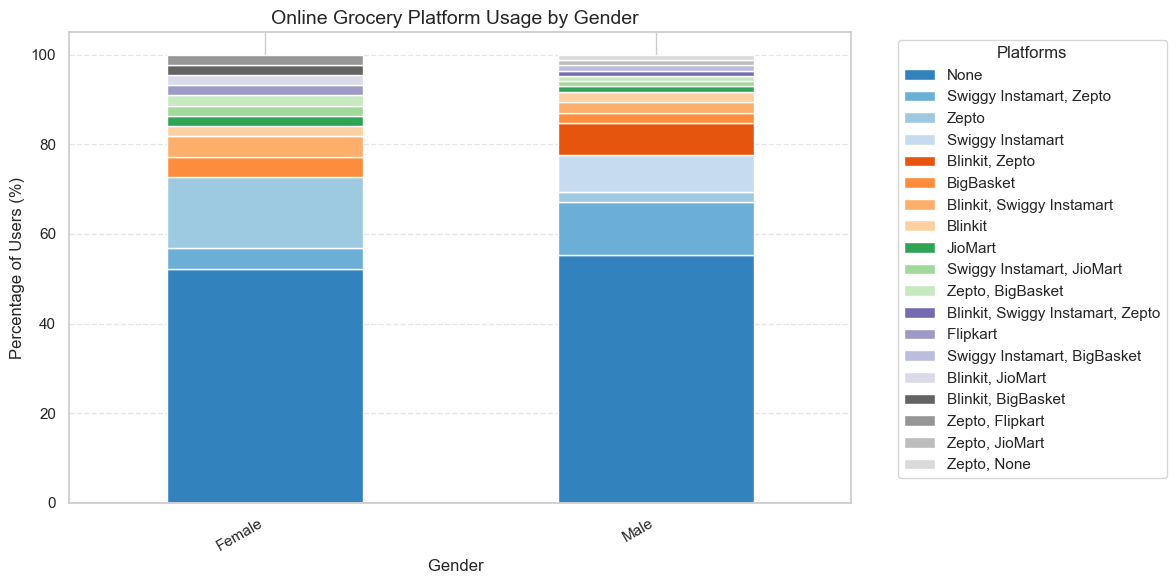

<Figure size 1200x600 with 0 Axes>

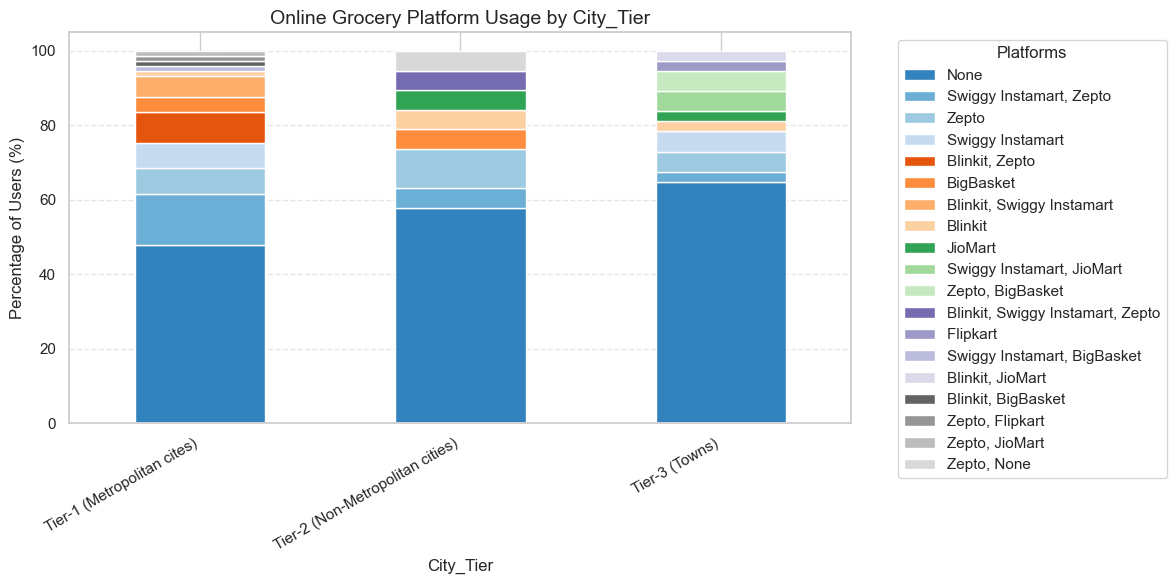

In [9]:
# Step 6: Online Grocery Adoption by Demographics
def plot_online_grocery_by(column):
    # Clean and prepare data
    df_clean = df.copy()
    
    # Fill NaN with 'Unknown' if needed
    df_clean[column] = df_clean[column].fillna('Unknown')
    df_clean['Used_Platforms'] = df_clean['Used_Platforms'].fillna('None')
    
    # Group and normalize to get percentages
    group = df_clean.groupby([column, 'Used_Platforms']).size().unstack(fill_value=0)
    group_percent = group.div(group.sum(axis=1), axis=0) * 100

    # Sort columns (platforms) consistently by total use
    sorted_platforms = group.sum().sort_values(ascending=False).index
    group_percent = group_percent[sorted_platforms]

    # Plot
    plt.figure(figsize=(12, 6))
    group_percent.plot(kind='bar', stacked=True, colormap='tab20c', figsize=(12, 6))

    # Improve layout
    plt.title(f"Online Grocery Platform Usage by {column}", fontsize=14)
    plt.ylabel("Percentage of Users (%)", fontsize=12)
    plt.xlabel(column, fontsize=12)
    plt.xticks(rotation=30, ha='right')
    plt.legend(title="Platforms", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

# Example usage:
plot_online_grocery_by("Age")
plot_online_grocery_by("Gender  ")
plot_online_grocery_by("City_Tier")

In [10]:
# Step 7: Flatten and clean app lists
from collections import Counter

app_list = df['Used_Platforms'].dropna().apply(lambda x: [i.strip().lower() for i in str(x).split(',')])
flat_apps = [item for sublist in app_list for item in sublist if item != 'amazon fresh']
top_apps = pd.Series(Counter(flat_apps)).sort_values(ascending=False).head(5)
print("\n Top Grocery Apps (Excluding Amazon Fresh):\n", top_apps)


 Top Grocery Apps (Excluding Amazon Fresh):
 zepto               33
swiggy instamart    27
blinkit             16
bigbasket            8
jiomart              6
dtype: int64


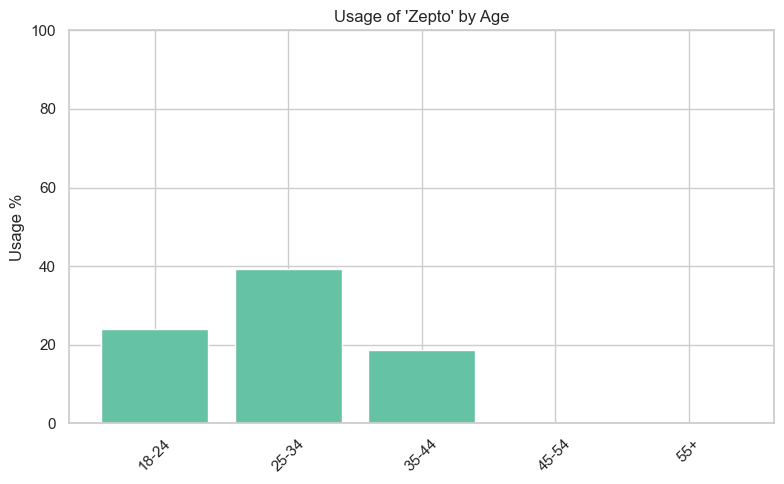

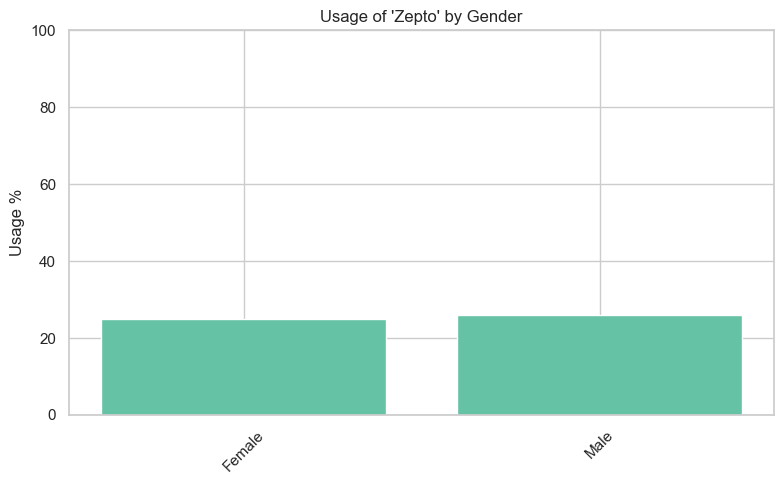

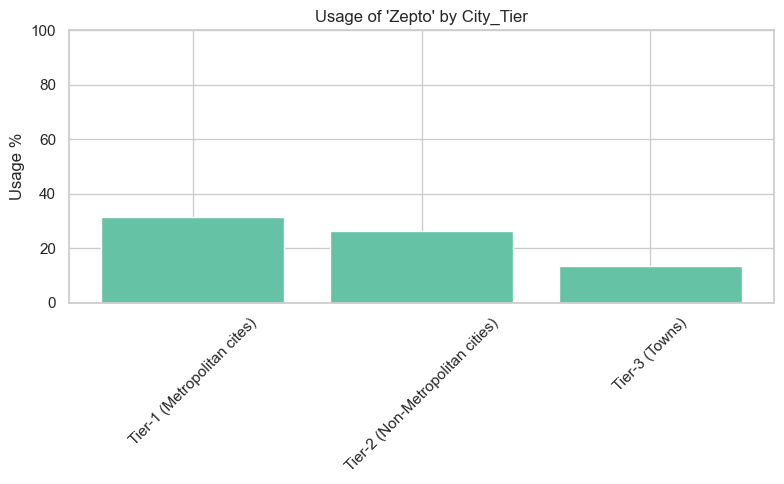

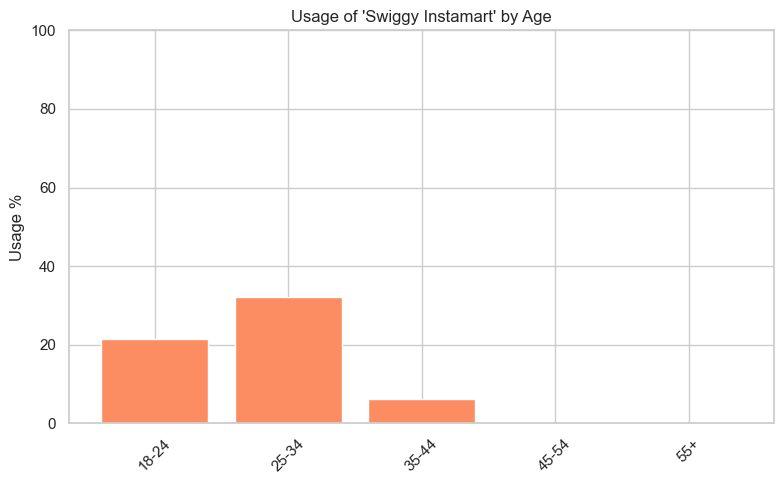

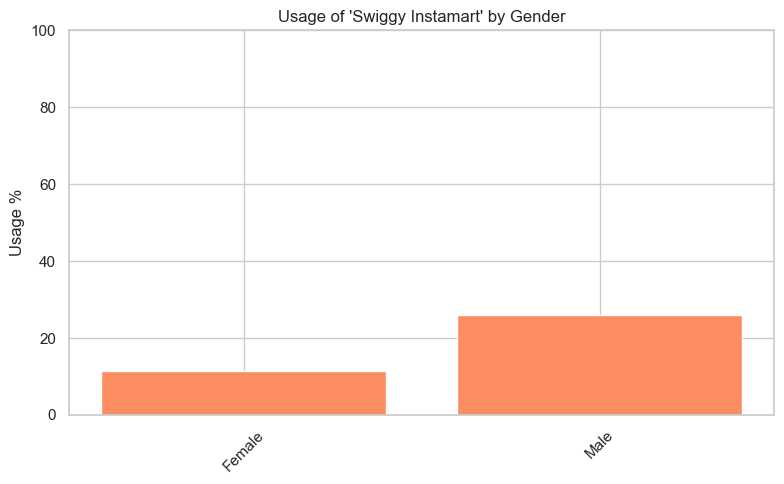

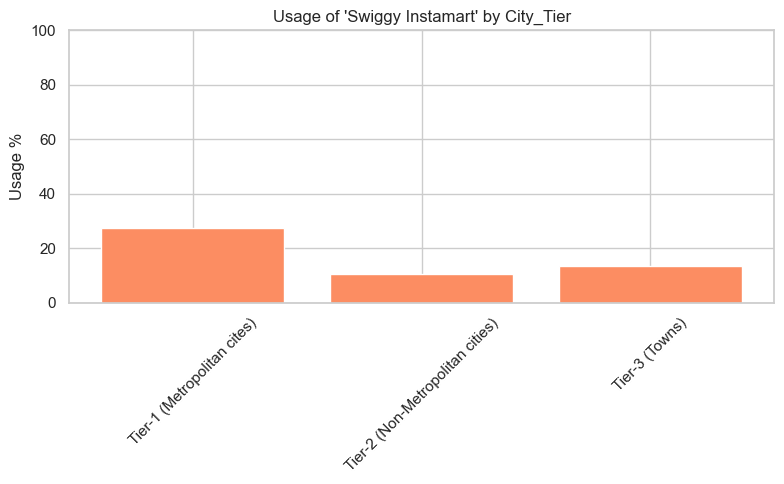

In [11]:
# Step 8: Top Grocery Apps Used (Excluding Amazon Fresh)
app_colors = sns.color_palette("Set2", n_colors=2)

# Get top 2 apps
top_two = list(top_apps.head(2).index)

# Create binary columns for each app usage
for app in top_two:
    df[app] = df['Used_Platforms'].fillna('').apply(lambda x: 1 if app in x.lower() else 0)

# Fixed plotting function using matplotlib directly for full control
def plot_app_usage_by(app, group_col, color):
    temp = df.groupby(group_col)[app].mean() * 100
    groups = temp.index.tolist()
    values = temp.values.tolist()

    plt.figure(figsize=(8, 5))
    plt.bar(groups, values, color=color)
    plt.title(f"Usage of '{app.title()}' by {group_col}")
    plt.ylabel("Usage %")
    plt.xticks(rotation=45)
    plt.ylim(0, 100)
    plt.tight_layout()
    plt.show()

# Plot with unique colors
for i, app in enumerate(top_two):
    plot_app_usage_by(app, "Age", app_colors[i])
    plot_app_usage_by(app, "Gender", app_colors[i])
    plot_app_usage_by(app, "City_Tier", app_colors[i])

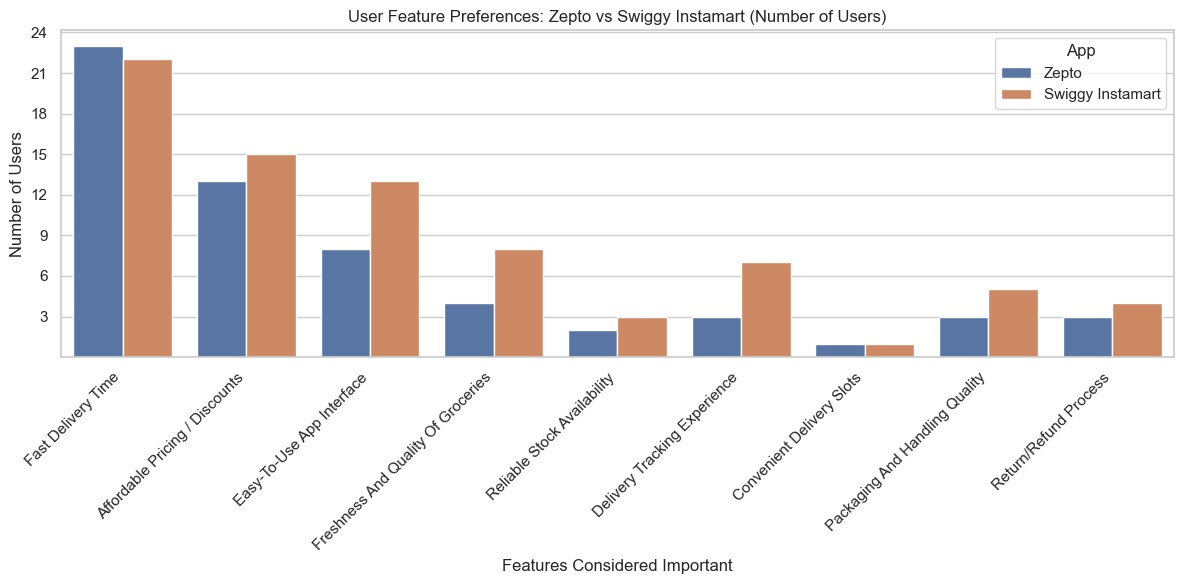

In [12]:
# step 9: Features comparison in Top 2 Apps
# Define actual feature columns
all_feature_cols = [
    'Category_fast delivery time', 'Category_affordable pricing / discounts', 
    'Category_easy-to-use app interface', 'Category_freshness and quality of groceries', 
    'Category_reliable stock availability', 'Category_delivery tracking experience', 
    'Category_convenient delivery slots','Category_packaging and handling quality', 
    'Category_return/refund process'
]

# Filter only existing columns
feature_cols = [col for col in all_feature_cols if col in df.columns]

# Step 3: Strip column names and prepare cleaned platform list
df.columns = df.columns.str.strip()
df['platforms_cleaned'] = df['Used_Platforms'].dropna().apply(
    lambda x: [i.strip().lower() for i in str(x).split(',')]
)
df['zepto_user'] = df['platforms_cleaned'].apply(lambda x: 'zepto' in x if isinstance(x, list) else False)
df['swiggy_instamart_user'] = df['platforms_cleaned'].apply(lambda x: 'swiggy instamart' in x if isinstance(x, list) else False)

# Filter app-specific user groups
zepto_users = df[df['zepto_user']]
swiggy_users = df[df['swiggy_instamart_user']]

# Count number of users who selected each feature
def feature_counts(data, label):
    return pd.DataFrame({
        'Feature': feature_cols,
        'Count': [data[col].sum() for col in feature_cols],
        'App': label
    })

zepto_stats = feature_counts(zepto_users, 'Zepto')
swiggy_stats = feature_counts(swiggy_users, 'Swiggy Instamart')

# Combine data for plotting
plot_df = pd.concat([zepto_stats, swiggy_stats])
plot_df['Feature'] = (
    plot_df['Feature']
    .str.replace('Category_', '', regex=False)
    .str.replace('.1', '', regex=False)
    .str.replace('_', ' ')
    .str.title()
)

# Plot bar chart of user counts
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Count', hue='App', data=plot_df)
plt.title("User Feature Preferences: Zepto vs Swiggy Instamart (Number of Users)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Users")
plt.xlabel("Features Considered Important")

# Set custom Y-axis with 3 intervals
max_count = plot_df['Count'].max()
yticks = list(range(3, int(max_count + 4), 3))
plt.yticks(yticks)

plt.tight_layout()
plt.show()


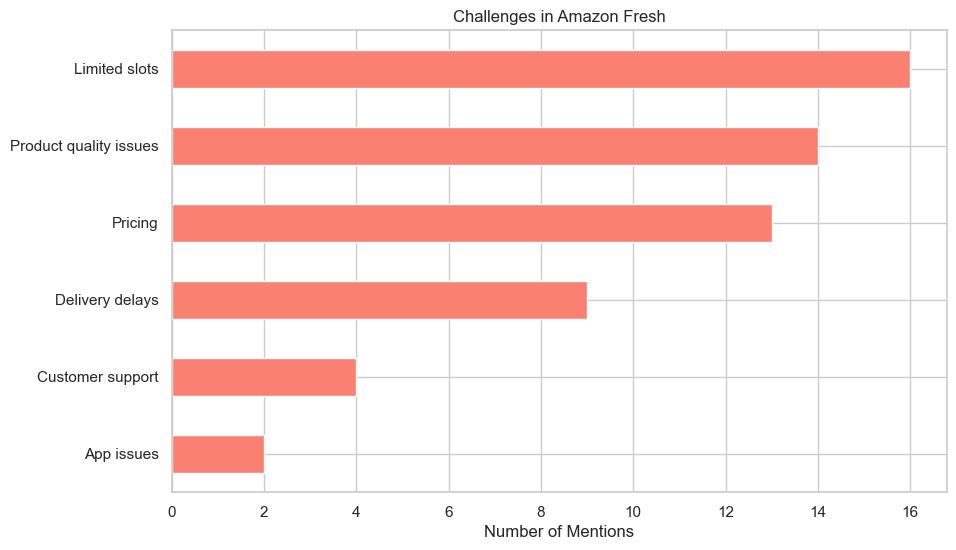

In [13]:
# Step 10: Challenges in Amazon Fresh
if 'Amazon_Fresh_Challenges_Dissatisfaction' in df.columns:
    challenges_series = df['Amazon_Fresh_Challenges_Dissatisfaction'].dropna().apply(lambda x: [i.strip() for i in str(x).split(',')])
    flat_challenges = [item for sublist in challenges_series for item in sublist]
    challenge_counts = pd.Series(Counter(flat_challenges)).sort_values(ascending=False)
    
    challenge_counts.plot(kind='barh', color='salmon')
    plt.title("Challenges in Amazon Fresh")
    plt.xlabel("Number of Mentions")
    plt.gca().invert_yaxis()
    plt.show()
else:
    print("⚠️ Amazon_Fresh_Challenges column not found.")

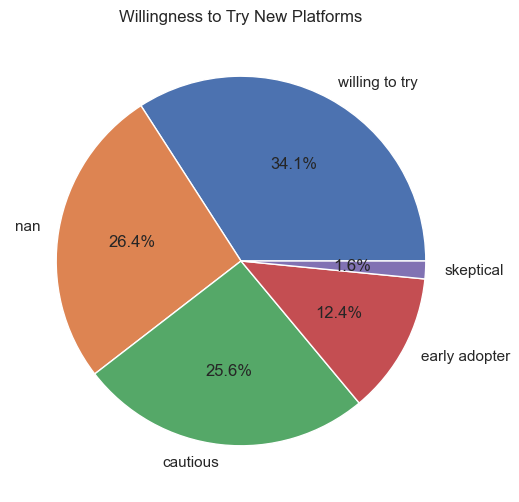

In [14]:
# Step 11: Willingness to Try New Platforms
if 'Willingness' in df.columns:
    willingness = df['Willingness'].astype(str).str.strip().str.lower().value_counts(normalize=True) * 100
    willingness.plot(kind='pie', autopct='%1.1f%%', title='Willingness to Try New Platforms', ylabel='')
    plt.show()
else:
    print("⚠️ Willingness column not found.")